# Joining dataframes: concat, merge, and join

TODO: df1.merge(df2)  OR pd.merge(df1,df2)
      which option is better? which syntx?
      streamlining the opertations

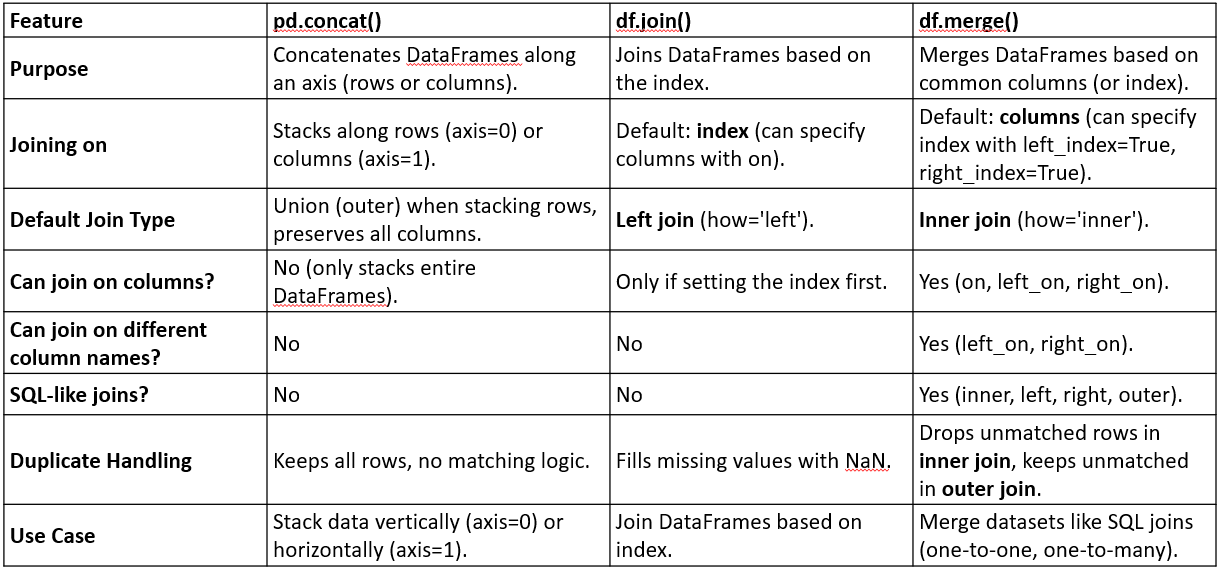

#[1] concat

In [ ]:
#@title india weather dataframe
import pandas as pd

india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})

display(india_weather)

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [ ]:
#@title us weather dataframe
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})

display(us_weather)

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [ ]:
#@title concat (add the two dataframes)
df = pd.concat([india_weather, us_weather])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [ ]:
#@title concat (with ignore index)
df2 = india_weather + us_weather
display(df2)  #element-wise addition; Not useful in this case

df_row_wise = pd.concat([india_weather, us_weather], ignore_index=True)
display(df_row_wise)

df_column_wise = pd.concat([india_weather, us_weather], axis = 1, ignore_index=True)
display(df_column_wise)

,city,temperature,humidity
0,mumbainew york,53,148
1,delhichicago,59,125
2,bangloreorlando,65,153


,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


,0,1,2,3,4,5
0,mumbai,32,80,new york,21,68
1,delhi,45,60,chicago,14,65
2,banglore,30,78,orlando,35,75


In [ ]:
#@title concat with keys (identifying the source)
df = pd.concat([india_weather, us_weather], keys=["india", "us"])
display(df)
display(df.iloc[2])
#display(india_weather[0])
# Question: How to explore hierarchical indexes?

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

,india
,2
city,banglore
temperature,30
humidity,78


In [ ]:
#@title locating the key
us_df = df.loc["us"]
display(us_df)

india_df = df.loc["india"]
display(india_df)


,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [ ]:
#@title concat by index (concat by columns) (vertical join)

temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])

display(temperature_df)

windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
display(windspeed_df)

df = pd.concat([temperature_df,windspeed_df], axis=1)
display(df)


,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


,city,windspeed
1,delhi,7
0,mumbai,12


,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


In [ ]:
#@title concat a Series (column) to a dataframe
print("Original")
display(temperature_df)

humidity_series = pd.Series(["Humid","Dry","Rain"], name="humidity")
display(humidity_series)


df = pd.concat([temperature_df, humidity_series],axis=1)
display(df)



Original


,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


,humidity
0,Humid
1,Dry
2,Rain


,city,temperature,humidity
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,30,Rain


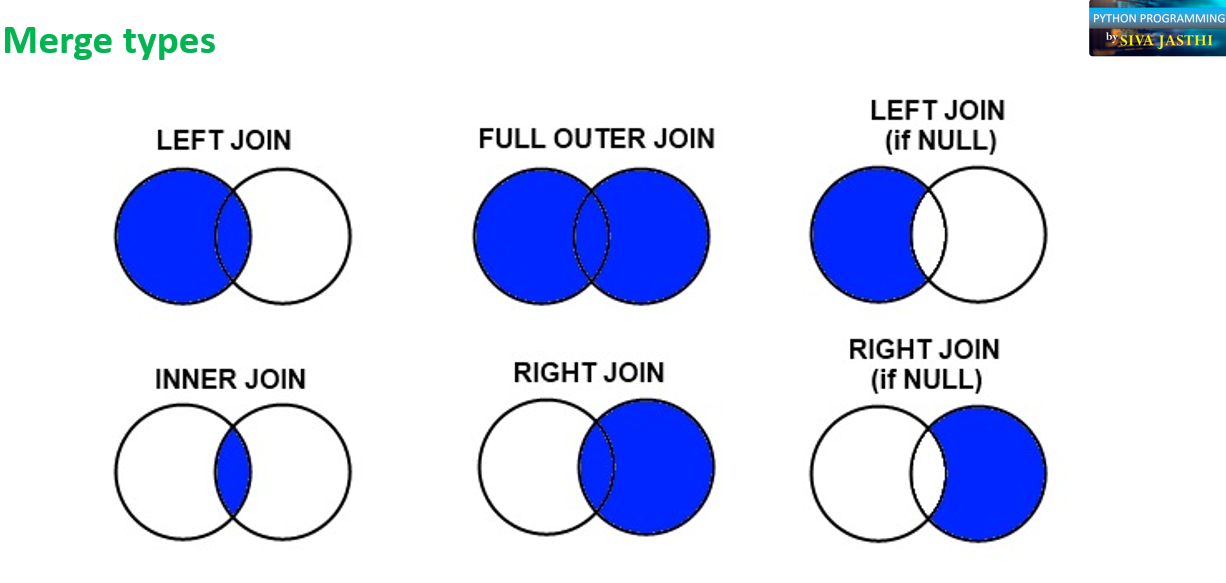

#[2]merge - Example Set 1

In [ ]:
#@title Data for merge (Customers and Orders)
import pandas as pd
# Creating example dataframes for customers and orders
customers = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4],
    'CustomerName': ['Anna', 'Bindu', 'Charlie', 'David']
})

orders = pd.DataFrame({
    'OrderID': [101, 102, 103, 104, 105],
    'CustomerID': [1, 2, 2, 3, 5],
    'Amount': [250, 400, 150, 200, 300]
})

display(customers)
display(orders)

,CustomerID,CustomerName
0,1,Anna
1,2,Bindu
2,3,Charlie
3,4,David


,OrderID,CustomerID,Amount
0,101,1,250
1,102,2,400
2,103,2,150
3,104,3,200
4,105,5,300


In [ ]:
#@title performing the merges (left, right, inner, outer)
# Performing different types of joins
left_join = customers.merge(orders, on='CustomerID', how='left')
right_join = customers.merge(orders, on='CustomerID', how='right')
inner_join = customers.merge(orders, on='CustomerID', how='inner')
inner_join_default = customers.merge(orders, on='CustomerID')
outer_join = customers.merge(orders, on='CustomerID', how='outer')

# Right join with only NULLs from the right table
right_join_null = orders.merge(customers, on='CustomerID', how='right', indicator=True)
right_join_null = right_join_null[right_join_null['_merge'] == 'right_only'].drop(columns=['_merge'])

# Left join with only NULLs from the left table
left_join_null = customers.merge(orders, on='CustomerID', how='left', indicator=True)
left_join_null = left_join_null[left_join_null['_merge'] == 'left_only'].drop(columns=['_merge'])

# Display results
display("Left Join:\n", left_join)
display("\nRight Join:\n", right_join)
display("\nInner Join:\n", inner_join)
display("\nInner Join (default):\n", inner_join_default)
display("\nOuter Join:\n", outer_join)
display("\nRight Join (If Null):\n", right_join_null)
display("\nLeft Join (If Null):\n", left_join_null)

'Left Join:\n'

,CustomerID,CustomerName,OrderID,Amount
0,1,Anna,101.0,250.0
1,2,Bindu,102.0,400.0
2,2,Bindu,103.0,150.0
3,3,Charlie,104.0,200.0
4,4,David,NaN,NaN


'\nRight Join:\n'

,CustomerID,CustomerName,OrderID,Amount
0,1,Anna,101,250
1,2,Bindu,102,400
2,2,Bindu,103,150
3,3,Charlie,104,200
4,5,NaN,105,300


'\nInner Join:\n'

,CustomerID,CustomerName,OrderID,Amount
0,1,Anna,101,250
1,2,Bindu,102,400
2,2,Bindu,103,150
3,3,Charlie,104,200


'\nInner Join (default):\n'

,CustomerID,CustomerName,OrderID,Amount
0,1,Anna,101,250
1,2,Bindu,102,400
2,2,Bindu,103,150
3,3,Charlie,104,200


'\nOuter Join:\n'

,CustomerID,CustomerName,OrderID,Amount
0,1,Anna,101.0,250.0
1,2,Bindu,102.0,400.0
2,2,Bindu,103.0,150.0
3,3,Charlie,104.0,200.0
4,4,David,NaN,NaN
5,5,NaN,105.0,300.0


'\nRight Join (If Null):\n'

,OrderID,CustomerID,Amount,CustomerName
4,NaN,4,NaN,David


'\nLeft Join (If Null):\n'

,CustomerID,CustomerName,OrderID,Amount
4,4,David,NaN,NaN


#(2) merge - Example Set 2

In [ ]:
#@title Merge (Professors and Classes data set)
import pandas as pd

# Creating example dataframes for classes and professors
classes = pd.DataFrame({
    'ClassID': [101, 102, 103, 104, 105, 106, 107],
    'ClassName': ['Math', 'Science', 'History', 'English', 'Physics', 'CS', 'Biology']
})

professors = pd.DataFrame({
    'ProfessorID': [1, 2, 3, 4, 5],
    'ClassID': [101, 102, 102, 103, 108],
    'ProfessorName': ['Dr. Smith', 'Dr. Johnson', 'Dr. Lee', 'Dr. Brown', 'Dr. White']
})

# Performing different types of joins
left_join = classes.merge(professors, on='ClassID', how='left')
right_join = classes.merge(professors, on='ClassID', how='right')
inner_join = classes.merge(professors, on='ClassID', how='inner')
outer_join = classes.merge(professors, on='ClassID', how='outer')

# Right join with only NULLs from the right table
right_join_null = professors.merge(classes, on='ClassID', how='right', indicator=True)
right_join_null = right_join_null[right_join_null['_merge'] == 'right_only'].drop(columns=['_merge'])

# Left join with only NULLs from the left table
left_join_null = classes.merge(professors, on='ClassID', how='left', indicator=True)
left_join_null = left_join_null[left_join_null['_merge'] == 'left_only'].drop(columns=['_merge'])

# Display results
print("Left Join:\n", left_join)
print("\nRight Join:\n", right_join)
print("\nInner Join:\n", inner_join)
print("\nOuter Join:\n", outer_join)
print("\nRight Join (If Null):\n", right_join_null)
print("\nLeft Join (If Null):\n", left_join_null)


Left Join:
    ClassID ClassName  ProfessorID ProfessorName
0      101      Math          1.0     Dr. Smith
1      102   Science          2.0   Dr. Johnson
2      102   Science          3.0       Dr. Lee
3      103   History          4.0     Dr. Brown
4      104   English          NaN           NaN
5      105   Physics          NaN           NaN
6      106        CS          NaN           NaN
7      107   Biology          NaN           NaN

Right Join:
    ClassID ClassName  ProfessorID ProfessorName
0      101      Math            1     Dr. Smith
1      102   Science            2   Dr. Johnson
2      102   Science            3       Dr. Lee
3      103   History            4     Dr. Brown
4      108       NaN            5     Dr. White

Inner Join:
    ClassID ClassName  ProfessorID ProfessorName
0      101      Math            1     Dr. Smith
1      102   Science            2   Dr. Johnson
2      102   Science            3       Dr. Lee
3      103   History            4     Dr. Brown


#[2] merge - Exampe Set 2

## Basic Merge Using a Dataframe Column

In [ ]:
#@title dataframe 1 (city and temparature)
import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})

display(df1)

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [ ]:
#@title dataframe 2 (city and humidity)
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [ ]:
#@title merge the dataframes: natural join
# natural join: letting python figure out the column for merging
df3 = pd.merge(df1, df2)
display(df3)

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [ ]:
#@title merge on a column (explicit join)
#Let python know how you want to merge
df4 = pd.merge(df1, df2, on="city")
display(df4)

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


## merge and types of joins (inner, left, right, outer)

In [ ]:
#@title Dataframe (city, temperature)
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [ ]:
#@title Dataframe (city, humidity)
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [ ]:
#@title inner join (intersection / common)
df3=pd.merge(df1, df2, on="city", how="inner")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [ ]:
#@title outer join (all rows are merged)
df3=pd.merge(df1,df2, on="city", how="outer")
df3

,city,temperature,humidity
0,baltimore,38.0,NaN
1,chicago,14.0,65.0
2,new york,21.0,68.0
3,orlando,35.0,NaN
4,san diego,NaN,71.0


In [ ]:
#@title left join (merge on "left")
#all rows in left are preserved
df3 = pd.merge(df1, df2, on="city", how="left")
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [ ]:
#@title right join (merge on "right")
#all rows in right are preserved
df3 = pd.merge(df1, df2, on="city", how="right")
df3

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,san diego,NaN,71


## <font color='blue'>indicator flag</font>

In [ ]:
#@title How did the merge happen? indicator flag
df3 = pd.merge(df1, df2, on="city", how="outer", indicator=True)
df3

,city,temperature,humidity,_merge
0,baltimore,38.0,NaN,left_only
1,chicago,14.0,65.0,both
2,new york,21.0,68.0,both
3,orlando,35.0,NaN,left_only
4,san diego,NaN,71.0,right_only


In [ ]:
#@title How did the merge happen? indicator flag
df3 = pd.merge(df1, df2, on="city", how="inner", indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21,68,both
1,chicago,14,65,both


In [ ]:
#@title How did the merge happen? indicator flag
df3 = pd.merge(df1, df2, on="city", how="left", indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21,68.0,both
1,chicago,14,65.0,both
2,orlando,35,NaN,left_only
3,baltimore,38,NaN,left_only


In [ ]:
#@title How did the merge happen? indicator flag
df3 = pd.merge(df1, df2, on="city", how="right", indicator=True)
df3

,city,temperature,humidity,_merge
0,chicago,14.0,65,both
1,new york,21.0,68,both
2,san diego,NaN,71,right_only


## <font color='blue'>suffixes</font>

In [ ]:
#@title Dataframe (city, temperature, humidity)
import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [ ]:
#@title Dataframe (city, temperature, humidity)
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [ ]:
#@title merge with suffixes
df3= pd.merge(df1, df2, on="city", how="outer", suffixes=('_first','_second'))
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,baltimore,38.0,75.0,NaN,NaN
1,chicago,14.0,68.0,21.0,65.0
2,new york,21.0,65.0,14.0,68.0
3,orlando,35.0,71.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


#[3] join

In [ ]:
#@title join (on indexes)
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "boston"],
    "temperature": [21,14,35, 30],
})
df1.set_index('city',inplace=True)
df1

,temperature
city,
new york,21
chicago,14
orlando,35
boston,30


In [ ]:
#@title join (on indexes)
df2 = pd.DataFrame({
    "city": ["dallas","new york","orlando"],
    "humidity": [65,68,75],
})
df2.set_index('city',inplace=True)
df2

,humidity
city,
dallas,65
new york,68
orlando,75


In [ ]:
#@title join with suffixes (default is left join)
df1.join(df2,lsuffix='_l', rsuffix='_r')

,temperature,humidity
city,,
new york,21,68.0
chicago,14,NaN
orlando,35,75.0
boston,30,NaN


In [ ]:
#@title join with suffixes (how = left)
df1.join(df2,lsuffix='_l', rsuffix='_r', how = "left")

,temperature,humidity
city,,
new york,21,68.0
chicago,14,NaN
orlando,35,75.0
boston,30,NaN


In [ ]:
#@title join with suffixes (how = left)
df2.join(df1,lsuffix='_l', rsuffix='_r', how = "right")

,humidity,temperature
city,,
new york,68.0,21
chicago,NaN,14
orlando,75.0,35
boston,NaN,30


In [ ]:
#@title join with suffixes (how = inner)
df2.join(df1,lsuffix='_l', rsuffix='_r', how = "inner")

,humidity,temperature
city,,
new york,68,21
orlando,75,35


In [ ]:
#@title join with suffixes (how = outer)
df2.join(df1,lsuffix='_l', rsuffix='_r', how = "outer")

,humidity,temperature
city,,
boston,NaN,30.0
chicago,NaN,14.0
dallas,65.0,NaN
new york,68.0,21.0
orlando,75.0,35.0
